# Aufgabe 1

a)

In [1]:
V_ra = 240*3.20 # m**3

n = 50 # Personen
dV_sch = n*20e-3 # CO_2-Volumenstrom in m**3/h

k_zul = k_inf = 1100e-6 # 1100 ppM
k_0 = k_au = 400e-6 # 400 ppM

dV_au = dV_sch/(k_zul-k_au) # m**3/h
dV_au

1428.5714285714284

Es werden etwa $ 1430\,\frac{m^3}{h}$ Luft benötigt

In [2]:
beta = dV_au/V_ra # in h**(-1)
beta

1.8601190476190474

Das entspricht einem etwa 1.86-fachen Luftwechsel.

b)

In [3]:
t_beta = 1/beta
t_beta

0.5376000000000001

Die Zeitkonstante ist etwa eine halbe Stunde.

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

t,0.00,0.05,0.10,0.15,0.20
k,400.0,462.17,518.82,570.43,617.46


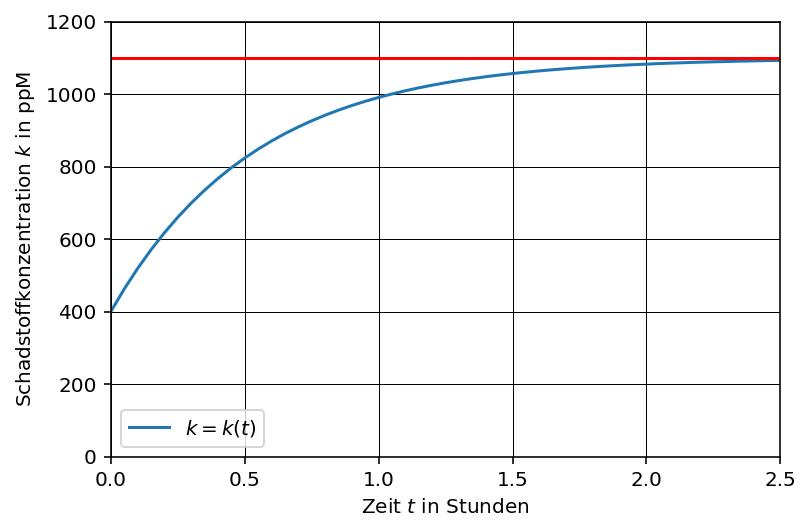

In [5]:
lt = np.linspace(0,2.5,51)

df = pd.DataFrame(
    {
        't': lt,
        'k': ((k_inf + (k_0-k_inf)*np.exp(-beta*lt))*1e6).round(2)
    }
)

display(df.head().set_index('t').T)

ax = df.plot(x='t',y='k',label='$k=k(t)$')

ax.axhline(k_zul*1e6,c='r')# in ppM

ax.set(
    xlim=(0,2.5), xlabel='Zeit $t$ in Stunden',
    ylim=(0,1200),ylabel='Schadstoffkonzentration $k$ in ppM'
    
)

ax.grid(lw=0.5,c='k')

$$
  1100 ppM + (400-1100)ppM\cdot\mathrm{e}^{-\beta\,t} 
  = 1050 ppM
$$

$$
  -700\,ppM \cdot\mathrm{e}^{-\beta\,t} = -50\,ppM
$$

$$
  \mathrm{e}^{-\beta\,t} = \dfrac{1}{14}
$$

$$
  t = 
  -\dfrac{1}{\beta}\,
  \ln
    \left(
      \dfrac{1}{14}
    \right)
$$

In [6]:
from math import log # das ist der ln

In [7]:
-log(1/14)/beta

1.4187572204011634

Nach etwa 1.4 Stunden ist der Wert $k=1050 ppM$ erreicht.

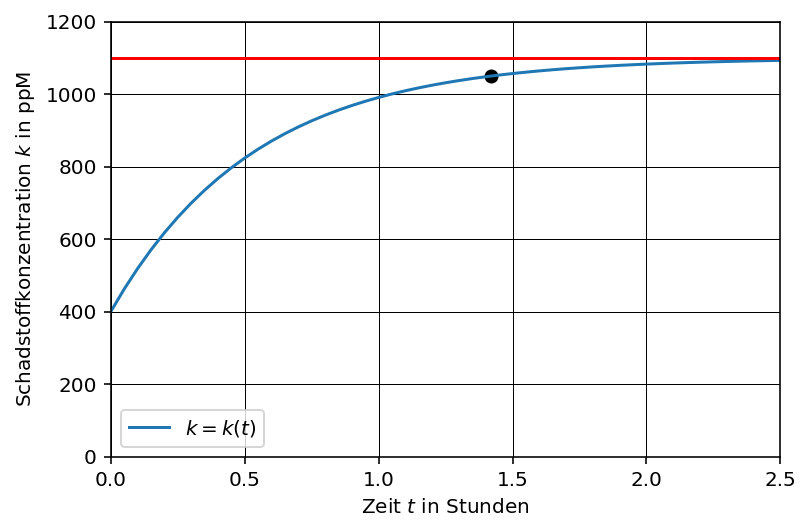

In [8]:
ax = df.plot(x='t',y='k',label='$k=k(t)$')

ax.axhline(k_zul*1e6,c='r')# in ppM

ax.scatter(-log(1/14)/beta,1050,c='k')

ax.set(
    xlim=(0,2.5), xlabel='Zeit $t$ in Stunden',
    ylim=(0,1200),ylabel='Schadstoffkonzentration $k$ in ppM'
    
)

ax.grid(lw=0.5,c='k')